## Binary Classification: Breast Cancer Wisconsin Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

** Dataset Information: **

characteristics of the cell nuclei from a digitized image of a fine needle aspirate (FNA) of a breast mass (total 569 instances). 

** Attribute Information: (31 features and 1 class)**

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

** Objective of this project **

predict whether a patient's breast tumor is malignant or benign (class; M or B) based on cell nuclei characteristics (features)

## Data

In [1]:
options(warn=-1)
# Load Data
df  <- read.csv('wdbc.data',header=FALSE)

In [2]:
# Inspect Data
head(df,3)
colnames(df)[2] <- 'label' #class -> label

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
842302,M,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
dim(df)

[1] 569  32

In [4]:
str(df)

'data.frame':	569 obs. of  32 variables:
 $ V1   : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ label: Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ V3   : num  18 20.6 19.7 11.4 20.3 ...
 $ V4   : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V5   : num  122.8 132.9 130 77.6 135.1 ...
 $ V6   : num  1001 1326 1203 386 1297 ...
 $ V7   : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V8   : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V9   : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V10  : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V11  : num  0.242 0.181 0.207 0.26 0.181 ...
 $ V12  : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V13  : num  1.095 0.543 0.746 0.496 0.757 ...
 $ V14  : num  0.905 0.734 0.787 1.156 0.781 ...
 $ V15  : num  8.59 3.4 4.58 3.44 5.44 ...
 $ V16  : num  153.4 74.1 94 27.2 94.4 ...
 $ V17  : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V18  : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
 $ V19  : num

In [5]:
summary(df)

       V1            label         V3               V4              V5        
 Min.   :     8670   B:357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 1st Qu.:   869218   M:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Median :   906024           Median :13.370   Median :18.84   Median : 86.24  
 Mean   : 30371831           Mean   :14.127   Mean   :19.29   Mean   : 91.97  
 3rd Qu.:  8813129           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
 Max.   :911320502           Max.   :28.110   Max.   :39.28   Max.   :188.50  
       V6               V7                V8                V9         
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0

In [6]:
table(df$label) #imbalanced labels


  B   M 
357 212 

In [7]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [8]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

Loading required package: lattice
Loading required package: ggplot2


** Drop ID column **

In [9]:
df = df[-1]
head(df,3)

label,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
M,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.0,1203,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


** Split Train Test Sets **

In [10]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [11]:
# standardize data
label_col  = 1
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

 label         V3                V4                V5         
 B:286   Min.   :-2.0170   Min.   :-2.0516   Min.   :-1.9716  
 M:170   1st Qu.:-0.6976   1st Qu.:-0.7307   1st Qu.:-0.6960  
         Median :-0.2438   Median :-0.1031   Median :-0.2542  
         Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
         3rd Qu.: 0.5423   3rd Qu.: 0.5808   3rd Qu.: 0.5604  
         Max.   : 3.8934   Max.   : 4.7167   Max.   : 3.8970  
       V6                V7                 V8                V9         
 Min.   :-1.4372   Min.   :-2.39119   Min.   :-1.5674   Min.   :-1.0987  
 1st Qu.:-0.6699   1st Qu.:-0.73665   1st Qu.:-0.7328   1st Qu.:-0.7443  
 Median :-0.3134   Median :-0.03992   Median :-0.2238   Median :-0.3301  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3948   3rd Qu.: 0.63377   3rd Qu.: 0.4614   3rd Qu.: 0.5247  
 Max.   : 5.1006   Max.   : 4.70374   Max.   : 4.4214   Max.   : 4.1372  
      V10               V11              

## Baseline Model

In [12]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"


Call:
summary.resamples(object = results)

Models: lda, logistic, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda      0.9239130 0.9450549 0.9450549 0.9452222 0.9560440 0.9560440    0
logistic 0.9340659 0.9340659 0.9450549 0.9517200 0.9673913 0.9780220    0
glmnet   0.9670330 0.9670330 0.9673913 0.9758958 0.9780220 1.0000000    0
svm      0.9450549 0.9560440 0.9673913 0.9649068 0.9780220 0.9780220    0
knn      0.9450549 0.9560440 0.9670330 0.9692785 0.9782609 1.0000000    0
nb       0.9230769 0.9340659 0.9340659 0.9363832 0.9450549 0.9456522    0
cart     0.8791209 0.9120879 0.9230769 0.9144529 0.9239130 0.9340659    0
c50      0.9340659 0.9560440 0.9560440 0.9561156 0.9670330 0.9673913    0
bagging  0.8791209 0.9230769 0.9340659 0.9319398 0.9560440 0.9673913    0
rf       0.9340659 0.9560440 0.9560440 0.9561395 0.9565217 0.9780220    0
gbm      0.9450549 0.9560440 0.95

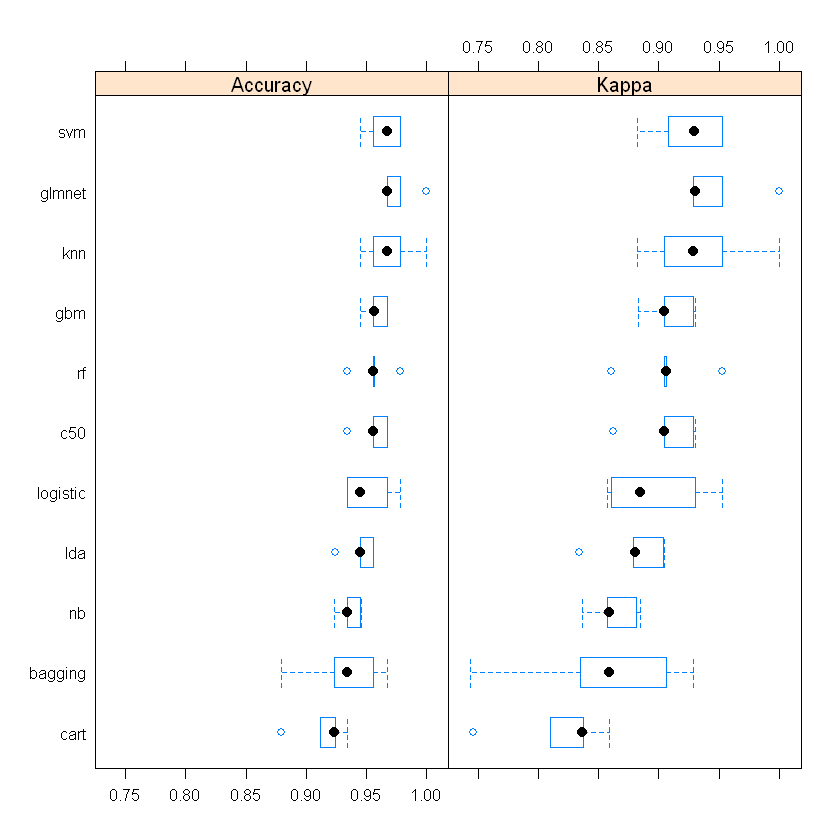

In [13]:
# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
set.seed(seed)
fit.glm <- train(label~., data=train_set, method="glm", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms by mean accuracy: glmnet, knn, svm, gbm

tuning parameters: http://topepo.github.io/caret/available-models.html

In [48]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: GLMNET

In [14]:
# default
fit.glmnet

glmnet 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0007666851  0.9693024  0.9339475
  0.10   0.0076668506  0.9758958  0.9478943
  0.10   0.0766685063  0.9649546  0.9234115
  0.55   0.0007666851  0.9715002  0.9385559
  0.55   0.0076668506  0.9715241  0.9383001
  0.55   0.0766685063  0.9539656  0.8989259
  1.00   0.0007666851  0.9649307  0.9244590
  1.00   0.0076668506  0.9671285  0.9288529
  1.00   0.0766685063  0.9407788  0.8692389

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.007666851.

glmnet 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  alpha  lambda       Accuracy   Kappa    
  0.0    0.000000000  0.9627568  0.9186858
  0.0    0.001000000  0.9627568  0.9186858
  0.0    0.005000000  0.9627568  0.9186858
  0.0    0.007666851  0.9627568  0.9186858
  0.0    0.100000000  0.9627568  0.9185146
  0.1    0.000000000  0.9692785  0.9340902
  0.1    0.001000000  0.9715002  0.9385559
  0.1    0.005000000  0.9758958  0.9478359
  0.1    0.007666851  0.9758958  0.9478943
  0.1    0.100000000  0.9605590  0.9136765
  0.5    0.000000000  0.9626851  0.9200860
  0.5    0.001000000  0.9715002  0.9385559
  0.5    0.005000000  0.9759197  0.9477463
  0.5    0.007666851  0.9715241  0.9383001
  0.5    0.100000000  0.9495700  0.8890722
  1.0    0.000000000  0.9517200  0.8971507
  1.0    0.001000000  0.9693263  0.9336818
  1.0    0.0050

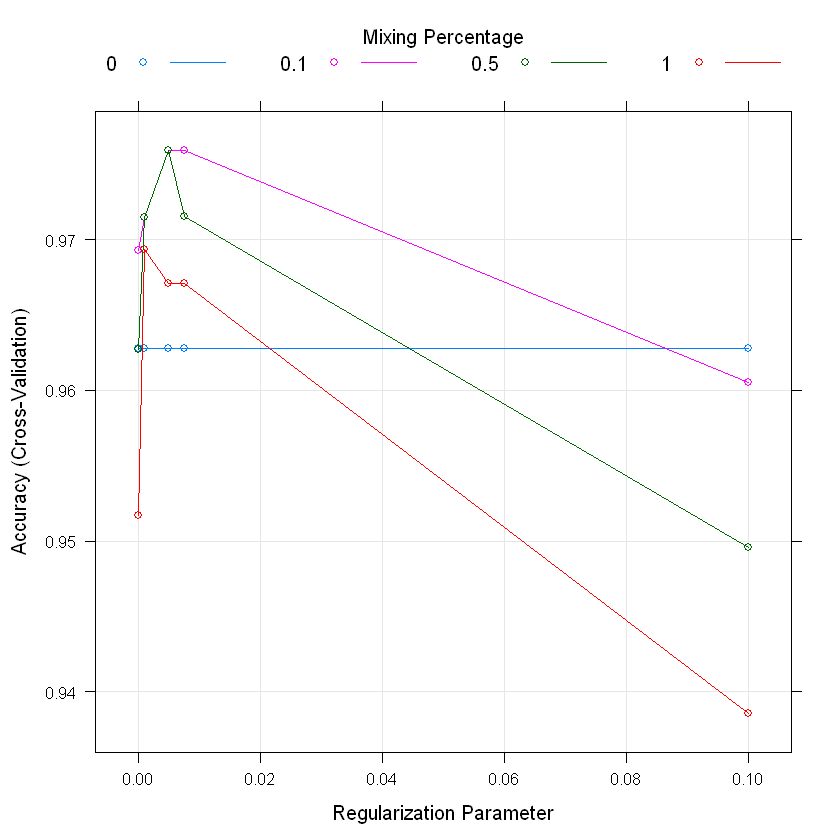

In [15]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = c(0,0.1,0.5,1),
                       lambda = c(0,0.001,0.005,0.0076668506,0.1))#seq(0,0.05,by = 0.001))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2. K-Nearest Neighbors

In [16]:
# default
fit.knn

k-Nearest Neighbors 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9604873  0.9150317
  7  0.9692785  0.9335866
  9  0.9648829  0.9239105

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

k-Nearest Neighbors 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9539417  0.9010717
   2  0.9561156  0.9059409
   3  0.9692785  0.9337011
   4  0.9560917  0.9050749
   5  0.9604873  0.9150317
   6  0.9626851  0.9196414
   7  0.9692785  0.9335866
   8  0.9670807  0.9289208
   9  0.9648829  0.9239105
  10  0.9648829  0.9238547
  11  0.9583134  0.9089594
  12  0.9605112  0.9136252
  13  0.9583134  0.9089625
  14  0.9539417  0.8994261
  15  0.9517200  0.8943856

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


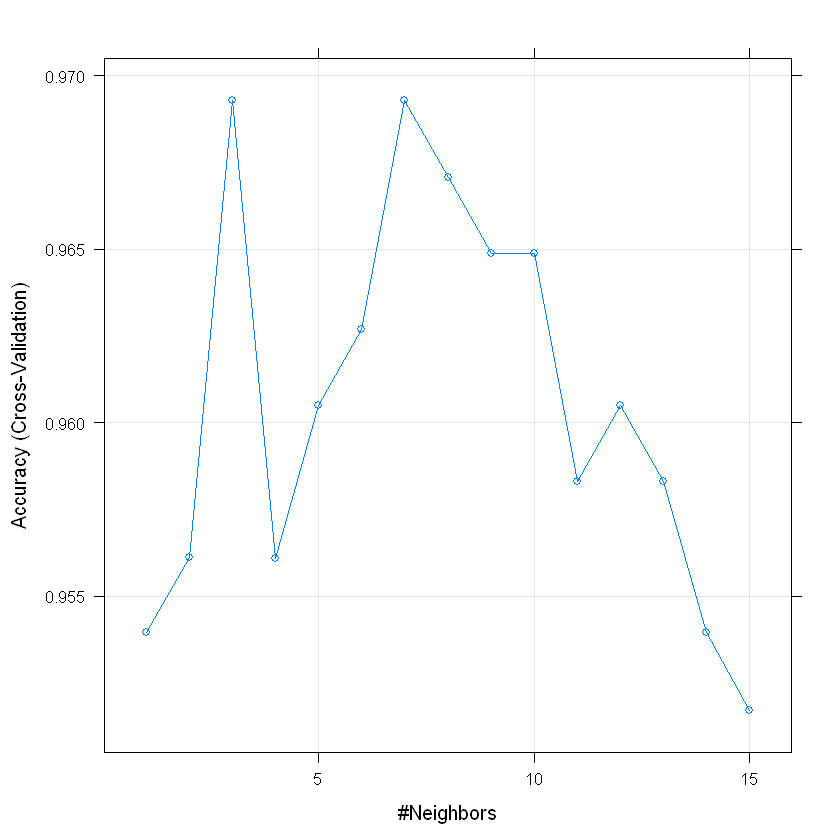

In [17]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.k=c(1:15))
gridSearch <- train(label~., data=train_set, method='knn',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 3. Support Vector Machine 

In [18]:
# default
fit.svmRadial

Support Vector Machines with Radial Basis Function Kernel 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9539417  0.9011362
  0.50  0.9627090  0.9206601
  1.00  0.9649068  0.9250586

Tuning parameter 'sigma' was held constant at a value of 0.04690903
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04690903 and C = 1.

Support Vector Machines with Radial Basis Function Kernel 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  sigma       C     Accuracy   Kappa     
  0.01000000   0.1  0.9495461  0.88963369
  0.01000000   1.0  0.9649307  0.92344636
  0.01000000   2.0  0.9736742  0.94297537
  0.01000000   4.0  0.9758720  0.94787089
  0.01000000   8.0  0.9758958  0.94784060
  0.01000000  10.0  0.9759197  0.94775030
  0.01000000  12.0  0.9781175  0.95247389
  0.01000000  16.0  0.9781175  0.95241816
  0.04690903   0.1  0.9341854  0.85853990
  0.04690903   1.0  0.9649068  0.92505859
  0.04690903   2.0  0.9715002  0.93912894
  0.04690903   4.0  0.9715002  0.93912894
  0.04690903   8.0  0.9649068  0.92551468
  0.04690903  10.0  0.9627090  0.92051408
  0.04690903  12.0  0.9605112  0.91584686
  0.04690903  16.0  0.9605112  0.91584686
  0.10000000   0.1  0.93

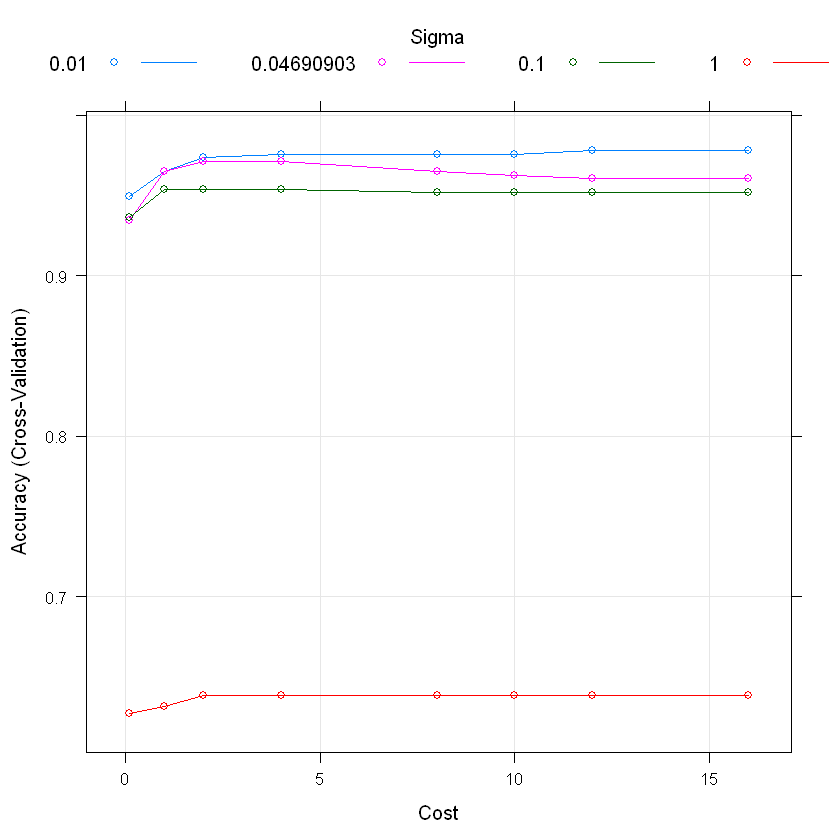

In [19]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.sigma=c(0.01,0.04690903,0.1,1), .C=c(0.1,1,2,4,8,10,12,16))
gridSearch <- train(label~., data=train_set, method='svmRadial',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4: Stochastic Gradient Boosting

In [20]:
# default
fit.gbm

Stochastic Gradient Boosting 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.9473722  0.8869137
  1                  100      0.9517439  0.8966248
  1                  150      0.9539417  0.9012933
  2                   50      0.9539417  0.9007363
  2                  100      0.9517439  0.8960607
  2                  150      0.9561395  0.9056221
  3                   50      0.9495700  0.8916918
  3                  100      0.9495461  0.8919529
  3                  150      0.9583373  0.9101804

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were n.trees =

Stochastic Gradient Boosting 

456 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 365, 365, 364, 365, 365 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01       1                  10              150      0.9298137  0.8477348
  0.01       1                  10              200      0.9320115  0.8526854
  0.01       1                  10              300      0.9407788  0.8724135
  0.01       1                  10              400      0.9473722  0.8862469
  0.01       1                  20              150      0.9276159  0.8428393
  0.01       1                  20              200      0.9364071  0.8625276
  0.01       1                  20              300      0.9430005  0.8763023
  0.01       1                  20              400      0.9451983  0.8812528
  0.01       3                  10              150      0.940754

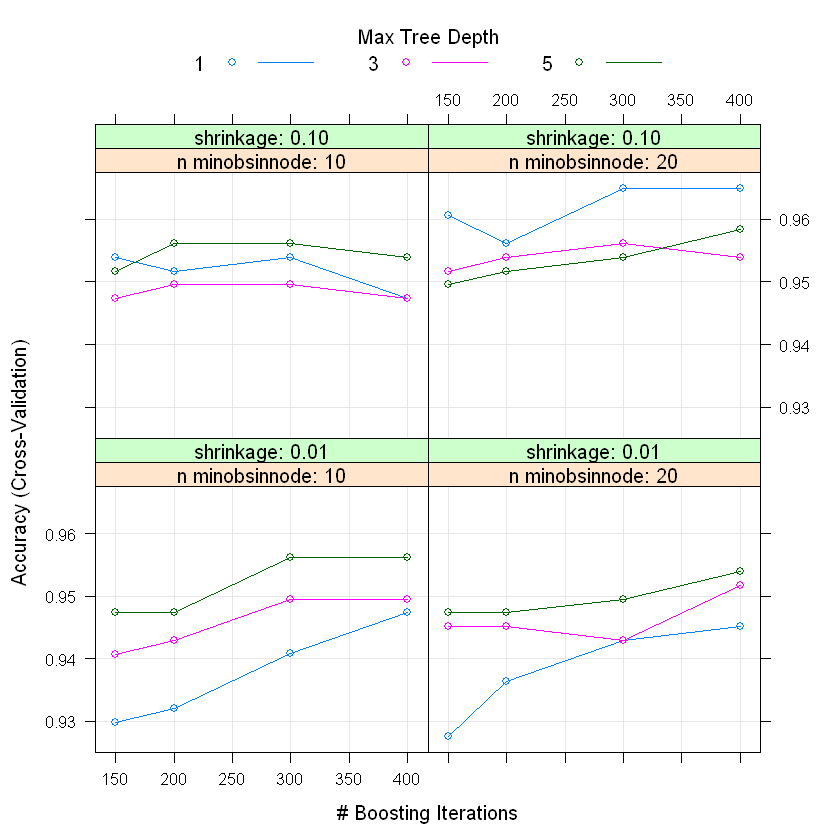

In [21]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(150,200,300,400),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

## Final Model: Support Vector Machine (SVM)

#### Params: sigma = 0.01 and C = 12

In [27]:
library(kernlab)
final.model <- ksvm(label~., data=train_set, kernel="rbfdot",
                    kpar=list(sigma=0.01), C=12)
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 12 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 51 

Objective Function Value : -306.621 
Training error : 0.010965 


#### Save and load the final model

In [24]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [25]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 12 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.01 

Number of Support Vectors : 51 

Objective Function Value : -306.621 
Training error : 0.010965 
Cross validation error : 0.026377 


#### Final Model Evaluation with Test set

In [28]:
predictions = predict(final.model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 70  3
         M  1 39
                                          
               Accuracy : 0.9646          
                 95% CI : (0.9118, 0.9903)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9235          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9859          
            Specificity : 0.9286          
         Pos Pred Value : 0.9589          
         Neg Pred Value : 0.9750          
             Prevalence : 0.6283          
         Detection Rate : 0.6195          
   Detection Prevalence : 0.6460          
      Balanced Accuracy : 0.9572          
                                          
       'Positive' Class : B               
                                          

## Summary

- Best model: **SVM** w/ param: sigma=0.01, C=12


- Accuracy of test set: **96.5%**